# D. Data Pre-processing

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayuv/onlineretail")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/vijayuv/onlineretail/versions/1


In [ ]:
import os
# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

D.1 General information about data, data inspection

In [ ]:
df=pd.read_csv(file_path, encoding='latin1')
df

# 'ISO-8859-1' = 'latin1'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Following Columns has wrong datatype

                       Current/ Correct

1.   InvoiceNo - Object/ int64
2.   InvoiceDate - Object / DateTime



Typecasting wrong columns

In [ ]:
df['InvoiceNo'].value_counts()

,count
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
C573244,1
573231,1
573230,1


'InvoiceNo' contains some string analysing the counts

In [ ]:
InvoiceNo_str = df['InvoiceNo'].str.contains(r'[A-Za-z]', na= False)
InvoiceNo_str.value_counts()

,count
InvoiceNo,
False,532618
True,9291


'InvoiceNo' contains 9291 string values in it which is 1.71% of whole data

In [ ]:
df[InvoiceNo_str]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
df[InvoiceNo_str]['InvoiceNo'].value_counts()

#C570867, C560540, C548460, C560855 etc

,count
InvoiceNo,
C570867,101
C560540,57
C548460,45
C560855,41
C538341,39
...,...
C537333,1
C537373,1
C537379,1


Stripping alphabets or exctracting numbers from 'InvoiceNo'

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].str.extract(r'(\d+)', expand=False).astype('int64')

#expand=False: Returns a Series else dataframe

In [ ]:
df[InvoiceNo_str]['InvoiceNo'].value_counts()

,count
InvoiceNo,
570867,101
560540,57
548460,45
560855,41
538341,39
...,...
537333,1
537373,1
537379,1


'InvoiceDate' to DateTime

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int64         
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 33.1+ MB


D.2 Checking & Handling missing values as well as Duplicates if any.

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df[df['Description'].isnull()], df[df['CustomerID'].isnull()]

(        InvoiceNo StockCode Description  Quantity         InvoiceDate  \
 622        536414     22139         NaN        56 2010-12-01 11:52:00   
 1970       536545     21134         NaN         1 2010-12-01 14:32:00   
 1971       536546     22145         NaN         1 2010-12-01 14:33:00   
 1972       536547     37509         NaN         1 2010-12-01 14:33:00   
 1987       536549    85226A         NaN         1 2010-12-01 14:34:00   
 ...           ...       ...         ...       ...                 ...   
 535322     581199     84581         NaN        -2 2011-12-07 18:26:00   
 535326     581203     23406         NaN        15 2011-12-07 18:31:00   
 535332     581209     21620         NaN         6 2011-12-07 18:35:00   
 536981     581234     72817         NaN        27 2011-12-08 10:33:00   
 538554     581408     85175         NaN        20 2011-12-08 14:06:00   
 
         UnitPrice  CustomerID         Country  
 622           0.0         NaN  United Kingdom  
 1970       

Missing data is nearly 25%, so we will impute

Imputing Description

In [ ]:
df['Description']=df.groupby('StockCode')['Description'].transform('first')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Method 2

df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Imputing CustomerID

In [ ]:
n=df[df['CustomerID'].isnull()]
n

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df[(df['InvoiceNo']==536544) & ~(df['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Inference - In whole Data InvoiceNo 536544 has no Customer ID

Going to check for some more Invoice No

In [ ]:
n['InvoiceNo'].head(1000).unique()

array([536414, 536544, 536545, 536546, 536547, 536549, 536550, 536552,
       536553, 536554, 536555, 536558, 536565, 536589, 536592])

In [ ]:
for i in n['InvoiceNo'].head(10000).unique():
  print(i,df[(df['InvoiceNo']==i) & ~(df['CustomerID'].isnull())].shape[0])
  print('\n')

536414 0


536544 0


536545 0


536546 0


536547 0


536549 0


536550 0


536552 0


536553 0


536554 0


536555 0


536558 0


536565 0


536589 0


536592 0


536596 0


536640 0


536755 0


536756 0


536764 0


536765 0


536780 0


536801 0


536862 0


536864 0


536865 0


536866 0


536876 0


536883 0


536885 0


536920 0


536941 0


536942 0


536982 0


536991 0


536995 0


536996 0


536997 0


536998 0


536999 0


537000 0


537001 0


537002 0


537003 0


537004 0


537005 0


537006 0


537007 0


537008 0


537009 0


537010 0


537011 0


537012 0


537013 0


537014 0


537015 0


537016 0


537017 0


537018 0


537019 0


537020 0


537021 0


537025 0


537027 0


537028 0


537029 0


537032 0


537220 0


537230 0


537237 0


537240 0


537251 0


537252 0


537253 0


537361 0


537363 0


537364 0


537401 0


537411 0


537425 0


537426 0


537427 0


537430 0


537432 0


537434 0


537436 0


537437 0


537438 0


537439 0


537442 0


537449 0



Inference- All this Invoice No. are without Customer ID so it will be difficult to impute it.

In [ ]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.shape

(406829, 8)

Handling Duplicates

In [ ]:
df.duplicated().sum()

5227

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(401602, 8)

D.3 Descriptive Statistics

In [ ]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401602.000000,401602.000000,401602,401602.000000,401602.000000
mean,560556.172014,12.182579,2011-07-10 12:08:08.129839872,3.474064,15281.172576
min,536365.000000,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,549130.000000,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,561814.000000,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,572033.000000,12.000000,2011-10-20 11:58:00,3.750000,16784.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,13086.500643,250.283248,NaN,69.764209,1714.002257


In [ ]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df[df['Quantity'] < 0].value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
581569     84978      HANGING HEART JAR T-LIGHT HOLDER     -1        2011-12-09 11:58:00  1.25       17315.0     United Kingdom    1
536379     D          Discount                             -1        2010-12-01 09:41:00  27.50      14527.0     United Kingdom    1
536383     35004C     SET OF 3 COLOURED  FLYING DUCKS      -1        2010-12-01 09:49:00  4.65       15311.0     United Kingdom    1
536391     21484      CHICK GREY HOT WATER BOTTLE          -12       2010-12-01 10:24:00  3.45       17548.0     United Kingdom    1
           21980      PACK OF 12 RED RETROSPOT TISSUES     -24       2010-12-01 10:24:00  0.29       17548.0     United Kingdom    1
                                                                                                                                  ..
536543     22632      HAND WARMER RED POLKA DOT            -1        2010-12-01 14:30:00  2.10       17841.0     United Kingdom    1
536548     20914      SET/5 RED RETROSPOT LID GLASS BOWLS  -1        2010-12-01 14:33:00  2.95       12472.0     Germany           1
           20957      PORCELAIN HANGING BELL SMALL         -1        2010-12-01 14:33:00  1.45       12472.0     Germany           1
           21218      RED SPOTTY BISCUIT TIN               -3        2010-12-01 14:33:00  3.75       12472.0     Germany           1
           22077      6 RIBBONS RUSTIC CHARM               -6        2010-12-01 14:33:00  1.65       12472.0     Germany           1
Name: count, Length: 8872, dtype: int64

It seems there are rows where data is negative

In [ ]:
for i in df.columns:
  if df[i].dtype == 'float64' or df[i].dtype == 'int64':
    print(i, df[df[i] < 0].shape[0])

InvoiceNo 0
Quantity 8872
UnitPrice 0
CustomerID 0


Dropping data from 'Quantity' where it's negative or selecting only data having positive values

In [ ]:
df = df[df['Quantity'] > 0]  # OR df.drop(df[df['Quantity'] < 0].index, inplace=True)

In [ ]:
df[df['Quantity'] < 0]   # successully removed, there's no data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Option 2 could have been considering it as clerical mistake and converting to positive values

df['Quantity'] = df['Quantity'].apply(lambda x : abs(x) if isinstance(x, (int, float)) else x)

In [ ]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392730.000000,392730.000000,392730,392730.000000,392730.000000
mean,560591.051463,13.153014,2011-07-10 19:15:08.632953856,3.125594,15287.746880
min,536365.000000,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,13087.124804,181.588304,NaN,22.240782,1713.563805


In [ ]:
df.loc[df['UnitPrice'] == 0,['StockCode', 'Description', 'UnitPrice']]

,StockCode,Description,UnitPrice
9302,22841,ROUND CAKE TIN VINTAGE GREEN,0.0
33576,22580,ADVENT CALENDAR GINGHAM SACK,0.0
40089,22423,REGENCY CAKESTAND 3 TIER,0.0
47068,22090,PAPER BUNTING RETROSPOT,0.0
47070,22553,PLASTERS IN TIN SKULLS,0.0
56674,22168,ORGANISER WOOD ANTIQUE WHITE,0.0
86789,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,0.0
130188,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,0.0
139453,22055,MINI CAKE STAND HANGING STRAWBERY,0.0
145208,22162,HEART GARLAND RUSTIC PADDED,0.0


Unit price can't be 0 so dropping, only 40 records O/W would have imputed

In [ ]:
df= df[df['UnitPrice'] != 0]  #OR df.drop(df[df['UnitPrice'] == 0].index, inplace=True)

D.3.1 Plotting boxplot to check outliers and quantifying them wrt whole data.

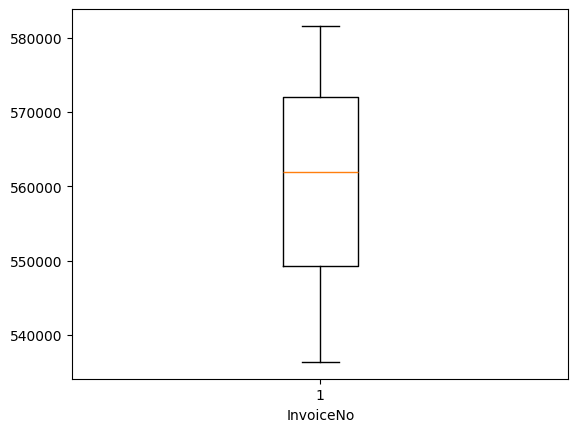

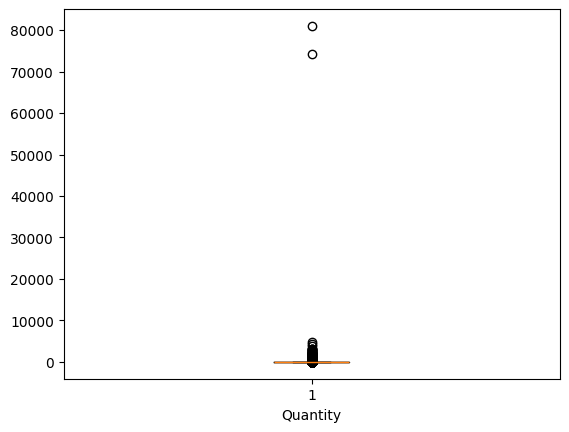

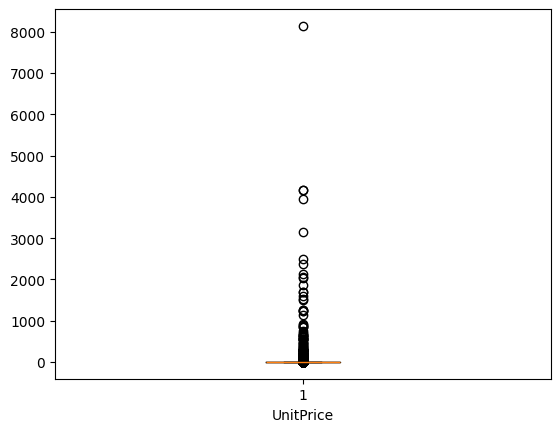

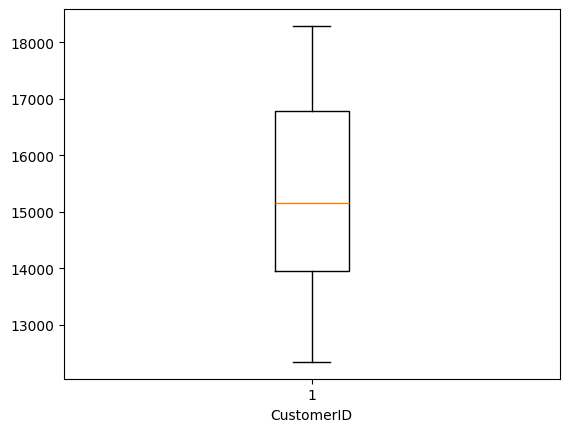

In [ ]:
import matplotlib.pyplot as plt

for i in df.columns:
  if df[i].dtype != 'object' and df[i].dtype != 'datetime64[ns]' :
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

Won't remove them as these are unique quantity & prices of orders

# E.Exploratory Data Analysis (EDA)

Unique Counts in all features

In [ ]:
for i in df.columns:
  if i==  'StockCode' or i== 'Description' or i=='CustomerID' or i== 'Country' :
    print(i, df[i].nunique())

StockCode 3665
Description 3641
CustomerID 4338
Country 37


Counts of all Unique things in all features

In [ ]:
for i in df.columns:
  if i!='InvoiceDate':
    m=df[i].value_counts().reset_index()
    print('\n',m)
    print('Counts of single data points : ',m[m['count']==1].shape[0])
    print('% of Single data points : ', (m[m['count']==1].shape[0]/m.shape[0])*100)


        InvoiceNo  count
0         576339    542
1         579196    533
2         580727    529
3         578270    442
4         573576    435
...          ...    ...
18527     547931      1
18528     560382      1
18529     560413      1
18530     578123      1
18531     578141      1

[18532 rows x 2 columns]
Counts of single data points :  1395
% of Single data points :  7.5275199654651415

      StockCode  count
0       85123A   2023
1        22423   1713
2       85099B   1615
3        84879   1395
4        47566   1389
...        ...    ...
3660    90065B      1
3661     47579      1
3662     22034      1
3663    79323P      1
3664     21667      1

[3665 rows x 2 columns]
Counts of single data points :  167
% of Single data points :  4.5566166439290585

                              Description  count
0                                mailout   2889
1     WHITE HANGING HEART T-LIGHT HOLDER   2023
2               REGENCY CAKESTAND 3 TIER   1713
3                JUMBO BAG RED RET

Inference- We can drop the data where % of single count is less, we will keep it for now

Adding 'TotalPrice' Column in data frame

Trying different group by conditions to focus on imp data

In [ ]:
df.insert(6, 'TotalPrice', df['Quantity']*df['UnitPrice'])

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


In [ ]:
df1=df.copy()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


# Exporting the final cleaned data into csv file for future use

In [ ]:
Final=df.to_csv('Final.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('Final.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
392686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
392687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
392688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


Basic Operations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392690 entries, 0 to 392689
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392690 non-null  int64  
 1   StockCode    392690 non-null  object 
 2   Description  392690 non-null  object 
 3   Quantity     392690 non-null  int64  
 4   InvoiceDate  392690 non-null  object 
 5   UnitPrice    392690 non-null  float64
 6   TotalPrice   392690 non-null  float64
 7   CustomerID   392690 non-null  float64
 8   Country      392690 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392690 entries, 0 to 392689
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  int64         
 1   StockCode    392690 non-null  object        
 2   Description  392690 non-null  object        
 3   Quantity     392690 non-null  int64         
 4   InvoiceDate  392690 non-null  datetime64[ns]
 5   UnitPrice    392690 non-null  float64       
 6   TotalPrice   392690 non-null  float64       
 7   CustomerID   392690 non-null  float64       
 8   Country      392690 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.0+ MB


# **F. Insights**

In final file keep product based on top then rest according to product

#### 1. Customer Based

1.1 Top 10 Customer Based on Order Value

In [ ]:
top10_customers=df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top10_customers

,CustomerID,TotalPrice
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


In [ ]:
top10_customers=df.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()
top10_customers

,CustomerID,TotalPrice
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


OR

In [ ]:
top10_customers.index=top10_customers.index + 1
top10_customers

,CustomerID,TotalPrice
1,14646.0,280206.02
2,18102.0,259657.30
3,17450.0,194390.79
4,16446.0,168472.50
5,14911.0,143711.17
6,12415.0,124914.53
7,14156.0,117210.08
8,17511.0,91062.38
9,16029.0,80850.84
10,12346.0,77183.60


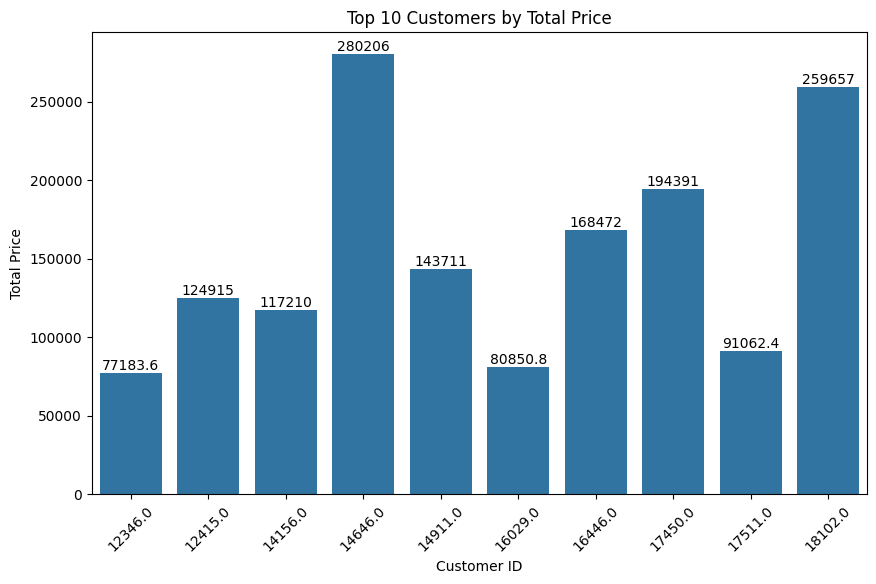

In [ ]:
# visualising top 10 customers using sns
plt.figure(figsize=(10, 6))

ax=sns.barplot(data=top10_customers, x='CustomerID', y='TotalPrice')
plt.xlabel('Customer ID')
plt.ylabel('Total Price')
plt.title('Top 10 Customers by Total Price')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.show()


Using Plotly

In [ ]:
top10_customers['CustomerID'] = top10_customers['CustomerID'].astype(str)

fig= px.bar(top10_customers,x='CustomerID', y='TotalPrice', text_auto=True)
fig.update_xaxes(tickangle=-45)  # OR 360-45 = 315
fig.update_layout(width=1200,height=600, xaxis_title= 'Cust', yaxis_title='Order Value', title = 'Top 10 Customers', title_x=0.5)

fig.show()

top10_customers

In [ ]:
print('Total Order Value by all Customers -', df['TotalPrice'].sum())
print('Total % Contribution of top 10 Customers is -', round(top10_customers['TotalPrice'].sum()/df['TotalPrice'].sum()*100,2), '%')
print('Total % of Order Value by 14646 - ', round(top10_customers.loc[1,'TotalPrice']/ df['TotalPrice'].sum()*100,2), '%')
print('Total % of Order Value by 18102 - ', round(top10_customers.loc[2,'TotalPrice']/ df['TotalPrice'].sum()*100,2), '%')

Total Order Value by all Customers - 8886657.044
Total % Contribution of top 10 Customers is - 17.3 %
Total % of Order Value by 14646 -  3.15 %
Total % of Order Value by 18102 -  2.92 %


Inference -


1.   Customer ID 14646,18102 are biggest customers
2.   Top 10 Customers contribute upto 17 % of total Order Value



#### 2. Product Based

2.1 Top favourite products of customers by order value

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
392686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
392687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
392688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


In [ ]:
top10_products= df.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()
top10_products.index= top10_products.index + 1
top10_products

,Description,TotalPrice
1,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2,REGENCY CAKESTAND 3 TIER,142264.75
3,WHITE HANGING HEART T-LIGHT HOLDER,100547.45
4,JUMBO BAG RED RETROSPOT,85040.54
5,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
6,mailout,78817.70
7,POSTAGE,77803.96
8,PARTY BUNTING,68785.23
9,ASSORTED COLOUR BIRD ORNAMENT,56413.03
10,Manual,53419.93


In [ ]:
fig = px.bar(top10_products, x= 'Description', y = 'TotalPrice', text_auto= True)
fig.update_layout(width = 1300, height = 700, xaxis_title= 'Product Name', yaxis_title = 'Order Value', title= 'Top 10 Selling Products', title_x=0.5)

fig.show()

In [ ]:
print(top10_products['TotalPrice'].sum())
print(df['TotalPrice'].sum())
print(round(top10_products['TotalPrice'].sum()/df['TotalPrice'].sum()*100,2), '%')

912978.92
8886657.044
10.27 %


Inference -


1.   PAPER CRAFT , LITTLE BIRDIE makes a biggest order value of Customers.
2.   Top 10 products contribute to 10% of total order value.



2.2 Top Ordered products of customers by quantity

In [ ]:
top10_quan= df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
top10_quan.index = top10_quan.index + 1
top10_quan

,Description,Quantity
1,"PAPER CRAFT , LITTLE BIRDIE",80995
2,MEDIUM CERAMIC TOP STORAGE JAR,77916
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
4,SMALL POPCORN HOLDER,49160
5,JUMBO BAG RED RETROSPOT,46078
6,mailout,42878
7,WHITE HANGING HEART T-LIGHT HOLDER,36763
8,ASSORTED COLOUR BIRD ORNAMENT,35263
9,PACK OF 72 RETROSPOT CAKE CASES,33670
10,RABBIT NIGHT LIGHT,27153


In [ ]:
fig = px.bar(top10_quan, x= 'Description', y = 'Quantity', text_auto=True)
fig.update_layout(width=1300,height= 700, xaxis_title = 'Product', yaxis_title='Quantity Ordered',
                  title = 'Top Ordered Products', title_x= 0.5)

fig.show()

Inference -


1.   'PAPER CRAFT , LITTLE BIRDIE' & 'MEDIUM CERAMIC TOP STORAGE JAR' are the products ordered in large quantities.



#### 3. Country Based

3.1 Countries giving maximum orders

In [ ]:
top10_co_order=df['Country'].value_counts().nlargest(10).reset_index()
top10_co_order

,Country,count
0,United Kingdom,349201
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1453
9,Australia,1181


In [ ]:
fig = px.bar(top10_co_order, x= 'Country', y = 'count', text_auto=True)
fig.update_layout(width=1300,height= 700, xaxis_title = 'Country', yaxis_title='Order Recieved',
                  title = 'Country wise Orders', title_x= 0.5)

fig.show()

Inference-


1.   We have maximum order from UK - 349201
2.   Germany, France & Ireland are next biggest customers



3.2 Countries giving maximum order value

In [ ]:
top10_country=df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()
top10_country

,Country,TotalPrice
0,United Kingdom,7284472.794
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


In [ ]:
fig=px.bar(top10_country, x='Country', y= 'TotalPrice', text_auto=True)
fig.update_layout(xaxis_title='Country', yaxis_title= 'Order Value', title='Country wise order value',title_x=0.5)

fig.show()

In [ ]:
print('Percentage of Order value from top country : ', round(top10_country['TotalPrice'][0]/df['TotalPrice'].sum()*100,2), '%')
print('Percentage of top 4 Countries except top : ',round(top10_country['TotalPrice'][1:5].sum()/df['TotalPrice'].sum()*100,2), '%')

Percentage of Order value from top country :  81.97 %
Percentage of top 4 Countries except top :  11.12 %


Inference -


1.   UK has maximum order value which is 82 % of total order value.
2.   Other top 4 countries have 11% share in total order value.



3.3 Countries having maximum unique customers

In [ ]:
Top10_cust_co=df.groupby('Country')['CustomerID'].agg('nunique').nlargest(10).reset_index()
Top10_cust_co

,Country,CustomerID
0,United Kingdom,3920
1,Germany,94
2,France,87
3,Spain,30
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,14
8,Finland,12
9,Austria,11


In [ ]:
fig=px.bar(Top10_cust_co, x='Country', y= 'CustomerID', text_auto=True)
fig.update_layout(xaxis_title='Country', yaxis_title= 'Number of Customers', title='Country wise Customer Numbers',title_x=0.5)

fig.show()

In [ ]:
print('Percentage of unique customers from top country : ',round(Top10_cust_co['CustomerID'][0]/ df['CustomerID'].nunique()*100,2), '%')
print('Percentage of top 4 countries except top : ',round(Top10_cust_co['CustomerID'][1:5].sum()/ df['CustomerID'].nunique()*100,2), '%')

Percentage of unique customers from top country :  90.36 %
Percentage of top 4 countries except top :  5.44 %


Inference -


1.   Uk has maximum number of customers - 90%
2.   5 Contries contribute to 96% of unique customers namely -
      1. UK
      2. Germany
      3. France
      4. Spain
      5. Belgium











3.4 Country wise Trending Product based on frequency

In [ ]:
b=df.groupby('Country')['Description']

list=[]
for i,j in b:
  c= j.value_counts().nlargest(1)
  list.append({'Country' : i, 'Description' : c.index[0], 'count' : c.iloc[0]})

In [ ]:
pr_df=pd.DataFrame(list)
pr_df.nlargest(10, 'count')

,Country,Description,count
35,United Kingdom,mailout,2620
14,Germany,POSTAGE,374
13,France,POSTAGE,300
10,EIRE,CARRIAGE,98
3,Belgium,POSTAGE,96
30,Spain,POSTAGE,62
12,Finland,POSTAGE,37
23,Netherlands,POSTAGE,37
32,Switzerland,POSTAGE,31
26,Portugal,POSTAGE,30


In [ ]:
fig=px.bar(pr_df.nlargest(10, 'count'), x= 'Country', y='count', text = 'Description',  hover_data=['Description'])
fig.update_layout(xaxis_title='Country', yaxis_title= 'Trending Product', title='Country wise Trending Product',title_x=0.5)
# Customize text position
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
fig= px.pie(pr_df.nlargest(10, 'count'), values='count', names='Country', title='Country wise Trending Product', hover_data= ['Description'])
fig.update_traces(textinfo='label+percent')
fig.show()

In [ ]:
fig = px.treemap(
    pr_df.nlargest(10, 'count'),
    path=['Country', 'Description','count'],  # Hierarchical data: Country > Description
    title="Country and Description Distribution"
)
fig.show()

In [ ]:
fig = px.sunburst(
    pr_df.nlargest(10, 'count'),
    path=['Country', 'Description','count'],
    title="Country and Description Sunburst"
)
fig.show()

3.5 Countrywise Highest Revenue generating products

In [ ]:
e= df.groupby(['Country','Description'])['TotalPrice'].sum().reset_index()
f=e.loc[e.groupby('Country')['TotalPrice'].idxmax()].nlargest(10,'TotalPrice')
f

,Country,Description,TotalPrice
17205,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.60
8091,Germany,POSTAGE,21001.00
6465,France,POSTAGE,15454.00
12413,Singapore,Manual,12158.90
10513,Netherlands,RABBIT NIGHT LIGHT,9568.48
4443,EIRE,REGENCY CAKESTAND 3 TIER,7337.55
9748,Japan,RABBIT NIGHT LIGHT,6100.32
13193,Spain,POSTAGE,5852.00
1388,Belgium,POSTAGE,4269.00
11928,Portugal,Manual,4223.94


In [ ]:
h=df.groupby('Country').apply(lambda x: x.nlargest(1,'TotalPrice').reset_index(drop=True))
h

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
Country,,,,,,,,,,
Australia,0,576394,23084,RABBIT NIGHT LIGHT,960,2011-11-15 10:32:00,1.79,1718.40,12415.0,Australia
Austria,0,547493,POST,POSTAGE,9,2011-03-23 12:06:00,40.00,360.00,12818.0,Austria
Bahrain,0,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96,2011-05-09 13:49:00,1.25,120.00,12355.0,Bahrain
Belgium,0,566076,POST,POSTAGE,11,2011-09-09 09:13:00,15.00,165.00,12449.0,Belgium
Brazil,0,550201,22423,REGENCY CAKESTAND 3 TIER,16,2011-04-15 10:25:00,10.95,175.20,12769.0,Brazil
Canada,0,560187,POST,POSTAGE,1,2011-07-15 12:05:00,550.94,550.94,17444.0,Canada
Channel Islands,0,544073,22720,SET OF 3 CAKE TINS PANTRY DESIGN,96,2011-02-15 14:44:00,4.25,408.00,14935.0,Channel Islands
Cyprus,0,544578,M,Manual,1,2011-02-21 14:04:00,320.69,320.69,12365.0,Cyprus
Czech Republic,0,545072,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2011-02-28 08:43:00,2.95,70.80,12781.0,Czech Republic


In [ ]:
h=df.groupby('Country').apply(lambda x: x.nlargest(1,'TotalPrice')).reset_index(drop=True)
j=h[['Country','Description','TotalPrice']].nlargest(10,'TotalPrice')
j

,Country,Description,TotalPrice
35,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",168469.60
23,Netherlands,RABBIT NIGHT LIGHT,4992.00
13,France,Manual,4161.06
29,Singapore,Manual,3949.32
19,Japan,ROUND SNACK BOXES SET OF 4 FRUITS,3794.40
10,EIRE,RED RETROSPOT CAKE STAND,2365.20
0,Australia,RABBIT NIGHT LIGHT,1718.40
30,Spain,PINK 3 PIECE POLKADOT CUTLERY SET,1350.00
26,Portugal,Manual,1241.98
31,Sweden,SET OF 3 BABUSHKA STACKING TINS,1188.00


In [ ]:
fig= px.bar(j, x= 'Country', y ='TotalPrice', text='Description')
fig.update_layout(width=1300,xaxis_title='Country', yaxis_title= 'Order Value', title='Country wise Max Selling Product',title_x=0.5)
fig.show()

In [ ]:
fig = px.treemap(j,
    path=['Country', 'Description','TotalPrice'],  # Hierarchical data: Country > Description
    title="Country wise top selling products"
)
fig.show()

In [ ]:
fig= px.pie(j, values='TotalPrice', names='Description', title='Country wise top selling products', hover_data= ['Country'])
fig.update_traces(textinfo='label+percent')
fig.show()

In [ ]:
fig = px.sunburst(j,
    path=['Country', 'Description','TotalPrice'],
    title="Country wise top selling products"
)
fig.show()

3.5 Most ordered Products in UK

In [ ]:
top10uk_quant=df[df['Country']=='United Kingdom'].groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
top10uk_quant


,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,76919
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
3,SMALL POPCORN HOLDER,45609
4,JUMBO BAG RED RETROSPOT,41878
5,mailout,36926
6,WHITE HANGING HEART T-LIGHT HOLDER,34687
7,ASSORTED COLOUR BIRD ORNAMENT,32628
8,PACK OF 12 LONDON TISSUES,24321
9,BROCADE RING PURSE,22675


In [ ]:
fig=px.bar(top10uk_quant, x='Description', y ='Quantity',text='Quantity')
fig.update_layout(width=1300,title= 'Most ordered Products in UK', title_x=0.5, xaxis_title='Product')

fig.show()

In [ ]:
print('Contribution of Highest Ordered Product',round(top10uk_quant.loc[0,'Quantity']/df[df['Country']=='United Kingdom']['Quantity'].sum()*100,2), '%')

Contribution of Highest Ordered Product 1.91 %


In [ ]:
df[df['Country']=='United Kingdom']['Quantity'].sum()

4241002

Inference -


1.   Product ordered in Highest quantity in UK is -MEDIUM CERAMIC TOP STORAGE JAR contributes to 5% of total quantity.



3.6 Highest Revenue Generating Products in UK

In [ ]:
top10uk_rev= df[df['Country']=='United Kingdom'].groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()
top10uk_rev


,Description,TotalPrice
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,110713.00
2,WHITE HANGING HEART T-LIGHT HOLDER,94960.85
3,MEDIUM CERAMIC TOP STORAGE JAR,80291.44
4,JUMBO BAG RED RETROSPOT,77191.33
5,mailout,68287.55
6,PARTY BUNTING,63050.28
7,ASSORTED COLOUR BIRD ORNAMENT,52228.68
8,PICNIC BASKET WICKER SMALL,46520.45
9,CHILLI LIGHTS,45483.91


In [ ]:
fig=px.bar(top10uk_rev, x='Description', y ='TotalPrice',text='TotalPrice')
fig.update_layout(width=1300,title= 'Highest Revenue Generating Products in UK', title_x=0.5, xaxis_title='Product', yaxis_title= 'Revenue Generated')

fig.show()

In [ ]:
print('Contribution of Highest Revenue Generating Product',round(top10uk_rev.loc[0,'TotalPrice']/df[df['Country']=='United Kingdom']['TotalPrice'].sum()*100,2), '%')

Contribution of Highest Revenue Generating Product 2.31 %


In [ ]:
df[df['Country']=='United Kingdom']['TotalPrice'].sum()

7284472.794000001

Inference -




1.   Highest Revenue Generating Product of UK is MEDIUM CERAMIC TOP STORAGE JAR which contributes to 3.2 %





**4. Time Based**

Basic Operations

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
392686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
392687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
392688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


Daily Revenue

In [ ]:
df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

,TotalPrice
InvoiceDate,
2010-12-01,46192.49
2010-12-02,47197.57
2010-12-03,23876.63
2010-12-05,31361.28
2010-12-06,31009.33
...,...
2011-12-05,58081.09
2011-12-06,45989.66
2011-12-07,69230.60


Monthly Revenue

In [ ]:
df.groupby(df['InvoiceDate'].dt.month_name(locale=None))['TotalPrice'].sum().reset_index(name='Month')

,InvoiceDate,Month
0,April,468374.331
1,August,644051.040
2,December,1087613.170
3,February,446084.920
4,January,568101.310
5,July,598962.901
6,June,660046.050
7,March,594081.760
8,May,677340.300
9,November,1155668.610


Daywise Revenue

In [ ]:
df.groupby(df['InvoiceDate'].dt.day_name(locale=None))['TotalPrice'].sum().reset_index(name='Weekday')

,InvoiceDate,Weekday
0,Friday,1483080.811
1,Monday,1363604.401
2,Sunday,785475.471
3,Thursday,1973015.730
4,Tuesday,1697733.801
5,Wednesday,1583746.830


4.1 Highest grossing month

In [ ]:
topmonth=df.groupby(df['InvoiceDate'].dt.month_name(locale=None))['TotalPrice'].sum().reset_index(name='Revenue').sort_values('InvoiceDate')
topmonth

,InvoiceDate,Revenue
0,April,468374.331
1,August,644051.040
2,December,1087613.170
3,February,446084.920
4,January,568101.310
5,July,598962.901
6,June,660046.050
7,March,594081.760
8,May,677340.300
9,November,1155668.610


In [ ]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
topmonth['InvoiceDate']= pd.Categorical(topmonth['InvoiceDate'], categories=month_order, ordered=True)
topmonth=topmonth.sort_values('InvoiceDate')
topmonth

,InvoiceDate,Revenue
4,January,568101.310
3,February,446084.920
7,March,594081.760
0,April,468374.331
8,May,677340.300
6,June,660046.050
5,July,598962.901
1,August,644051.040
11,September,950690.202
10,October,1035642.450


In [ ]:
fig=px.bar(topmonth, x='InvoiceDate', y ='Revenue',text='Revenue')
fig.update_layout(width=1300,title= 'Highest Revenue Generating Month', title_x=0.5, xaxis_title='Month', yaxis_title= 'Revenue Generated')

fig.show()

Inference -

1. Month of November marks the highest revenue generation
2. Month of April & February marks the lowest revenue generation





In [ ]:
fig=px.pie(topmonth, values='Revenue',names='InvoiceDate',hole=0.1)
fig.update_layout(title = 'Highest Revenue Generating Month',title_x=0.5,
                  title_font=dict(size=20, family="Verdana, sans-serif", color="green"))
fig.update_traces(textinfo='label+value+percent', pull=[0.3,0.2,0.1],
                  texttemplate='%{label}: %{value} (%{percent})')

fig.show()

In [ ]:
fig=px.line(topmonth, x='InvoiceDate', y ='Revenue',text='Revenue')
fig.update_layout(xaxis_title='Month', yaxis_title='Revenue',
                  title= 'Highest Revenue Generating Month',title_x=0.5,font=dict(size=16))
fig.add_annotation(x='September', y=950690.202, text="Significant Jump",
    font=dict(size=16, color="black"),showarrow=True, arrowhead=5)

fig.show()

# G. **Customer Segmentaion Based on Purchasing Behaviour**

1.   **Recency**: How recently a customer made a purchase.
2.   **Frequency**: How often a customer makes a purchase.
3. **Monetary**: How much a customer spends.





Data Preparation

In [ ]:
df=pd.read_csv('Final.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
392686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
392687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
392688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']=df['InvoiceDate'].dt.date

Calculate RFM Metrics

In [ ]:
reference=df['InvoiceDate'].max()

rfm= df.groupby('CustomerID').agg({
              'InvoiceDate': lambda x: (reference - x.max()).days,
              'InvoiceNo'  : 'nunique' ,
  # nuique- counts how many times customer purchased on diff invoices(though multiple items purchased in single bill, count- 1),
  # count- counts all rows where customerid appeared, even the duplicate ones(10 items purchased in single invoice, count- 10 )
              'TotalPrice' : 'sum'
                                  }
                                  ) .reset_index()
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo' : 'Frequency', 'TotalPrice' : 'Monetary'}, inplace=True)
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2045.53


Apply RFM Scoring

**R_Score**	- Asigning Highest R_score(5) to customers who purchased very recently (Low Recency).

**F_Score** - Assigning Highest F_score(5) to customers who purchased very frequently (High Frequency- more unique Invoice Count).

**M_Score** - Assigning Highest M_score(5) to customers who purchased of large order value.

In [ ]:
# Assign scores from 1 to 5 for each metric
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single score
rfm['RFM_Score'] = rfm['R_Score'].astype(int)*100 + rfm['F_Score'].astype(int)*10 + rfm['M_Score'].astype(int)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,244
3,12349.0,18,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.60,1,2,1,121
4334,18281.0,180,1,80.82,1,2,1,121
4335,18282.0,7,2,178.05,5,3,1,531
4336,18283.0,3,16,2045.53,5,5,4,554


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4338 non-null   float64 
 1   Recency     4338 non-null   int64   
 2   Frequency   4338 non-null   int64   
 3   Monetary    4338 non-null   float64 
 4   R_Score     4338 non-null   category
 5   F_Score     4338 non-null   category
 6   M_Score     4338 non-null   category
 7   RFM_Score   4338 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 182.9 KB


# Customer Segmentation

1. We will divide customers in groups namely 'Loyal', 'Regular', 'At Risk', 'Regular', 'Irregular', 'Recent visitors', 'Frequent Buyers', 'Big Spenders' based on RFM_Score.
2. RFM Score   

In [ ]:
np.linspace(111,555,4)

array([111., 259., 407., 555.])

In [ ]:
def segmentation(row):
    if row['RFM_Score'] == 555:
        return 'Loyal'
    elif row['RFM_Score'] == 111:
        return 'At Risk'
    elif (row['R_Score'] < 3) & (row['F_Score'] > 3):     #(row['R_Score'] < 3)= 4,5--> high score frequent
        return 'Regular'
    elif (row['R_Score'] > 3) & (row['F_Score'] < 3):     #(row['R_Score'] > 3)= 1,2 --> low score frequent
        return 'Irregular'
    elif row['R_Score'] == 5:
        return 'Recent Visitors'
    elif row['F_Score'] == 5:
        return 'Frequent Buyers'
    elif row['M_Score'] == 5:
        return 'Big Spenders'
    else:
        return 'Others'


rfm['Segments']= rfm.apply(segmentation,axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segments
0,12346.0,325,1,77183.60,1,1,5,115,Big Spenders
1,12347.0,2,7,4310.00,5,5,5,555,Loyal
2,12348.0,75,4,1797.24,2,4,4,244,Regular
3,12349.0,18,1,1757.55,4,1,4,414,Irregular
4,12350.0,310,1,334.40,1,1,2,112,Others
...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.60,1,2,1,121,Others
4334,18281.0,180,1,80.82,1,2,1,121,Others
4335,18282.0,7,2,178.05,5,3,1,531,Recent Visitors
4336,18283.0,3,16,2045.53,5,5,4,554,Recent Visitors


In [ ]:
rfm['Segments'].isna().sum()

0

In [ ]:
cust_seg=rfm.groupby('Segments').size().reset_index(name='Count')
cust_seg

,Segments,Count
0,At Risk,182
1,Big Spenders,143
2,Frequent Buyers,366
3,Irregular,312
4,Loyal,347
5,Others,2283
6,Recent Visitors,422
7,Regular,283


In [ ]:
fig=px.bar(cust_seg, x= 'Segments', y='Count', text='Count')
fig.update_layout(width=1000,height=500, title= 'Customer Segemenatation', title_x=0.5)

fig.show()

# H. Inferences


1. There are 4% of customers 'At Risk' who neither visits frquently nor gives significant Order Value.
2. 20%$ customers are 'Irregular' who does not buys frequently which are less than 'Regular' customers (16%).
3. Only 7% customers are 'Loyal' who are frequent as well as give big order values.


Analysing High Spending Customers

In [ ]:
Big_Spenders= rfm[(rfm['Segments']=='Big Spenders')]
Big_Spenders

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segments
0,12346.0,325,1,77183.60,1,1,5,115,Big Spenders
9,12356.0,22,3,2811.43,4,3,5,435,Big Spenders
10,12357.0,33,1,6207.67,3,1,5,315,Big Spenders
12,12359.0,57,4,6310.03,3,4,5,345,Big Spenders
13,12360.0,52,3,2662.06,3,3,5,335,Big Spenders
...,...,...,...,...,...,...,...,...,...
4008,17838.0,26,5,2720.80,4,4,5,445,Big Spenders
4184,18079.0,45,4,3613.15,3,4,5,345,Big Spenders
4191,18087.0,98,2,4055.72,2,3,5,235,Big Spenders
4314,18251.0,87,1,4314.72,2,2,5,225,Big Spenders


Big Spenders but Irregular, R_Score= 1,2

In [ ]:
Big_Spenders[(rfm['R_Score'] > 3)]['Monetary'].sum()

280160.00099999993

Big Spenders and Regular, R_Score= 4,5

In [ ]:
Big_Spenders[(rfm['R_Score'] < 3)]['Monetary'].sum()

185636.44

Insights-
1. 'Irregular' customers spends bigger than 'Regular' customers

# I. Model Building



*   As this is customer segmentation problem,  we will proceed with classification algorithm.
*   We will build 'Random Forest' and 'SVC' models as both can capture the complex relationship between data and generalise well.
*   'Random Forest' and 'SVC' both can deal with problem of overfitting efficiently.



 #### Loading Customer Segmentation Data

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segments
0,12346.0,325,1,77183.60,1,1,5,115,Big Spenders
1,12347.0,2,7,4310.00,5,5,5,555,Loyal
2,12348.0,75,4,1797.24,2,4,4,244,Regular
3,12349.0,18,1,1757.55,4,1,4,414,Irregular
4,12350.0,310,1,334.40,1,1,2,112,Others
...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.60,1,2,1,121,Others
4334,18281.0,180,1,80.82,1,2,1,121,Others
4335,18282.0,7,2,178.05,5,3,1,531,Recent Visitors
4336,18283.0,3,16,2045.53,5,5,4,554,Recent Visitors


 #### Seperating features and target variable

In [ ]:
x=rfm.drop("Segments",axis=1)
y=rfm["Segments"]

#### Splitting Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=0)

#### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Random Forest Accuracy is {accuracy:.2f}%')

Random Forest Accuracy is 100.00%


#### SVC

In [ ]:
from sklearn.svm import SVC


svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'SVC Accuracy is {accuracy:.2f}%')

SVC Accuracy is 96.89%


# J. Future Possibilities of the Project

- 'Customer Loyalty' - We can identify and 'AWARD' customers based on - 'Regular' and 'Loyal' customers who contribute consistently to revenue.
- 'Customer Retention' - Identifying customers based on their irregularity i.e high Recency & low R_score and focusing on them.
- 'Revenue Analysis' - Analysing the spending behaviours of different segments.
- 'Targeted Marketing' - Different campaigns for different customer segments i.e Rewards for Loyal and Win-back campaigns for Irregular customers.